# Traffic Sign Recognition

Reeha Khan, Maira Khalid and Afsheen Ahmed

The main algorithm we used in developing our program are convolutional neural networks 
that can classify traffic signs present in the image into different categories. We have used the 
NumPy, Pandas, Matplotlib, Keras and Scikit-learn libraries. We trained our model using CNNs 
and then evaluate our model by finding the accuracy on the testing data.

The dataset used for this project is the German Traffic Sign Detection Benchmark. This data has a total of 50,000 images each of dimension (30x30x3) where 3 represents the RGB channel. The dataset was further split into 27,446 training images, 11,763 validation images and 12,631 test images.

**Importing Libraries**

In [1]:
# NumPy, which stands for Numerical Python, 
# It is a library consisting of multidimensional array objects and a collection of routines for processing those arrays.
import numpy as np

# pandas is a software library written for the Python programming language for data manipulation and analysis. 
# In particular, it offers data structures and operations for manipulating numerical tables and time series
import pandas as pd

# The OS module in Python provides functions for creating and removing a folder,
# fetching its contents, changing and identifying the current folder
import os

#  cv2  is designed to solve computer vision problems. It loads the image from specified files
import cv2

# Matplotlib is a cross-platform, data visualization and graphical plotting library for Python
import matplotlib.pyplot as plt

# TensorFlow provides a collection of workflows to develop and train models using Python.
import tensorflow as tf

# Keras is a high-level, deep learning API (Application Programming Interface) developed by Google for implementing neural networks
from tensorflow import keras

# PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities.
from PIL import Image

# Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. 
# It provides a selection of efficient tools for machine learning and statistical modeling 
# including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

# train_test_split module is used to split the dataset into training and testing samples
from sklearn.model_selection import train_test_split

# Keras ImageDataGenerator is a gem! It lets you augment your images in real-time while your model is still training!
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
from tensorflow.keras.optimizers import Adam

# in order to find accuracy score we import this module
from sklearn.metrics import accuracy_score

np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')

**Assigning important variables**

In [2]:
# giving path/location of dataset
# savins as a string
data_dir = "C:/Users/Reeha Khan/Desktop/seventh semester/Studies/ML/project/Python-Project-Traffic-Sign-Classification/model"
# assiging train and test folders to variables
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
# parameters for training images
IMG_HEIGHT = 30
IMG_WIDTH = 30
# channel=3 means we are using RGB channel
channels = 3

In [3]:
# finidng total number of categories of training traffic sign images 
# listdir() method in python is used to get the list of all files and directories in the specified directory.
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
# Naming all categories by using the Dictionary data structure 
# creating dictionary will be help full while training and testing our dataset
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

**Loading, Understanding and Visualizing the dataset**

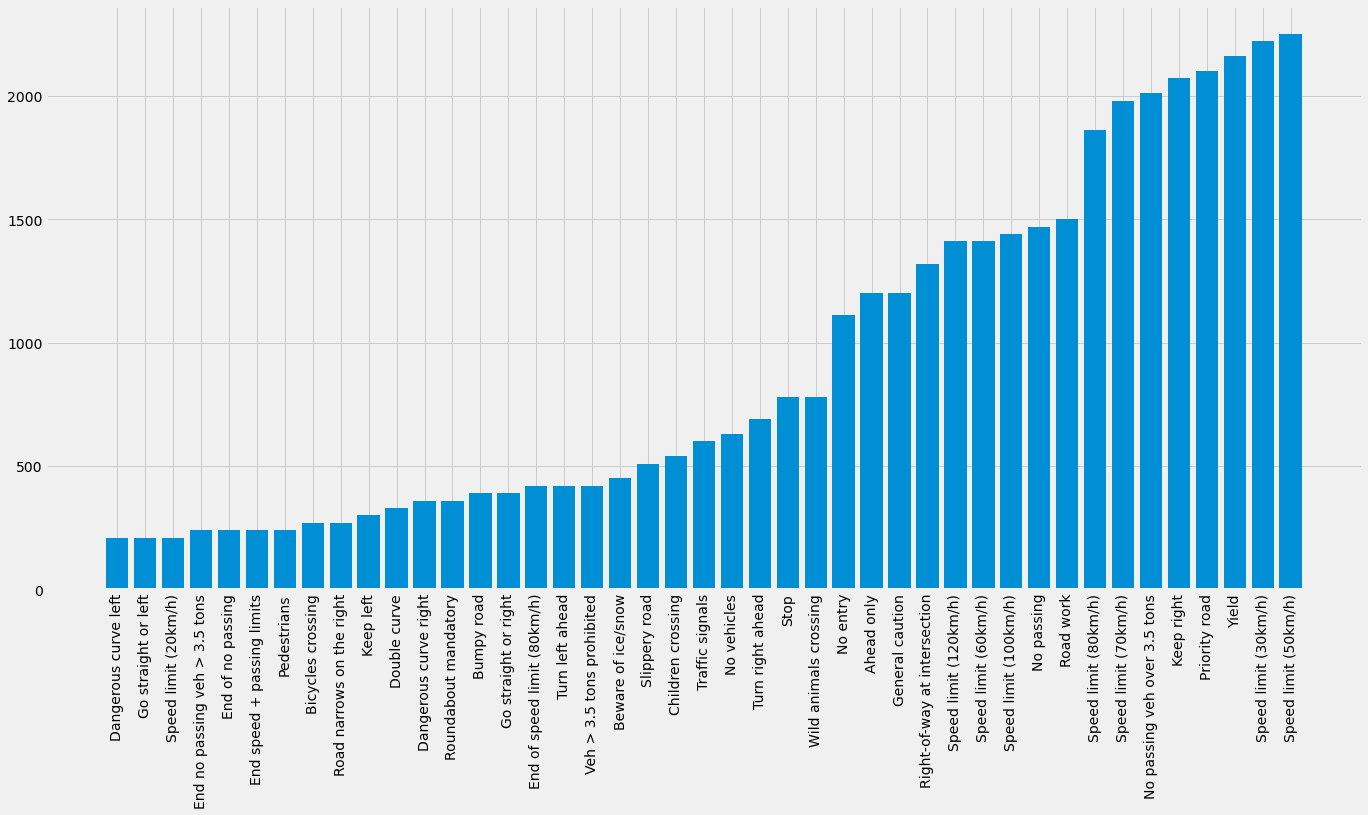

In [5]:
# In this block of code we find the count of images in each class
# listdir() method in python is used to get the list of all files and directories in the specified directory.
folders = os.listdir(train_path)

# counter variables
train_number = []
class_num = []

# calculating the total number of images in each class
# folder is the loop variable here
for folder in folders:
    # train_files contain all the files in the train folder
    train_files = os.listdir(train_path + '/' + folder)
    # train_number contains total number of images in each folder
    train_number.append(len(train_files))
    # in this code we are classifying the images and finding the sum of images in each class
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
# here we form tuples of train number with it's class number
zipped_lists = zip(train_number, class_num)
# we sort the classes in ascending order according to the total number of images in each class
sorted_pairs = sorted(zipped_lists)
# here we unzip the sorted tuples
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

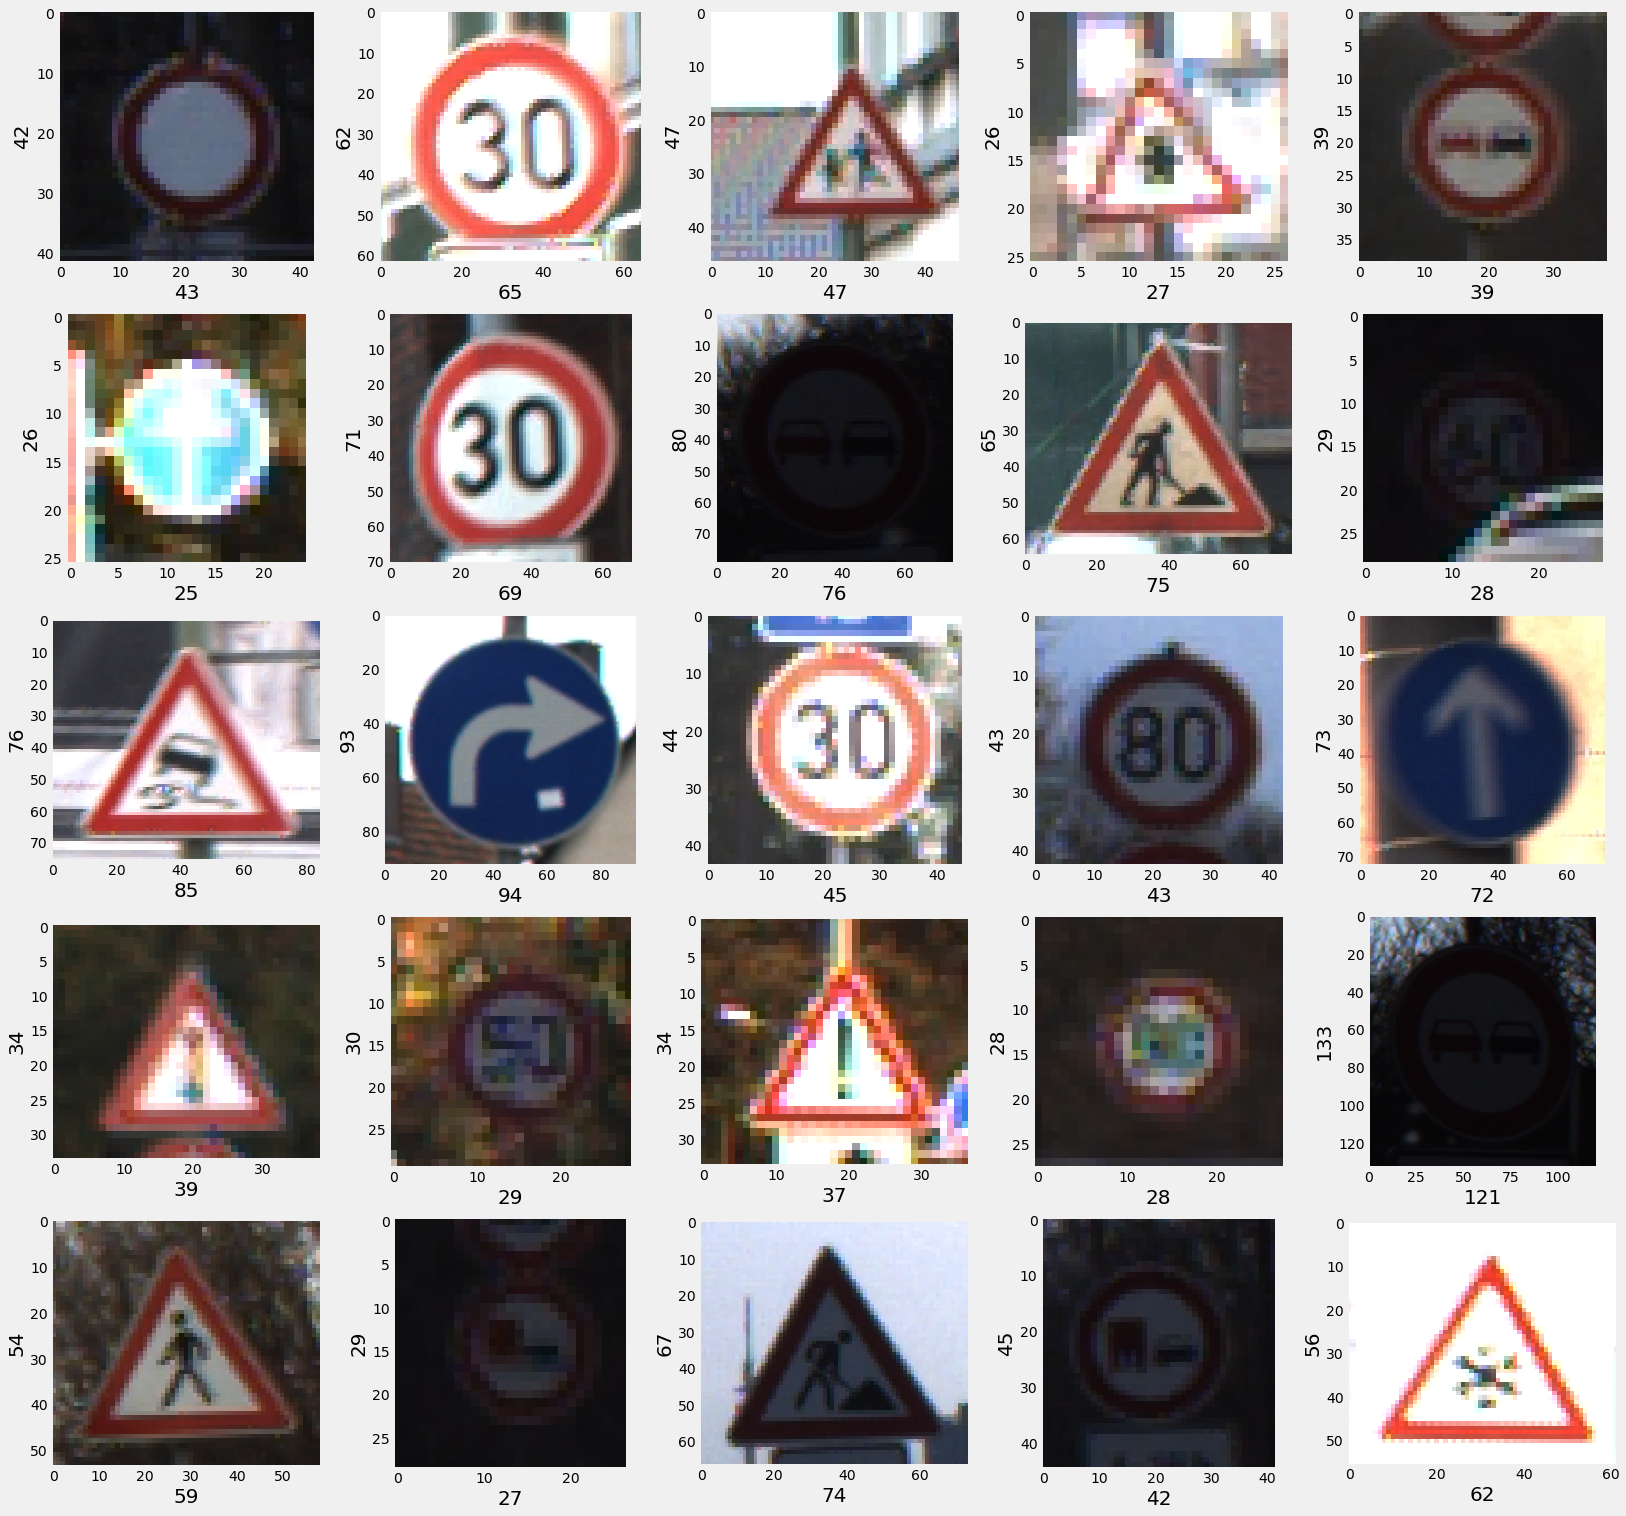

In [6]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

# importing the csv file
test = pd.read_csv(data_dir + '/Test.csv')
# loading path of test images
imgs = test["Path"].values

# the whole figure would have size of 25x25 pixels 
plt.figure(figsize=(25,25))

# range is from 1-25
for i in range(1,26):
  # 5 rows, 5 columns and i represents the loop variable
    plt.subplot(5,5,i)
    # giving random images path here
    random_img_path = data_dir + '/' + random.choice(imgs)
    # reading the image path
    rand_img = imread(random_img_path)
    # displaying the image
    plt.imshow(rand_img)
    # doesn't display the grid in the back 
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

**Splitting the features and labels of the Training Data**

In [7]:
# creating two lists one for image data and the other for image labels
image_data = []
image_labels = []

# this loop will run for 43 times since the number of categories are 43
for i in range(NUM_CATEGORIES):
  # here we take path of all the training images present in the training folder
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)
    for img in images:
        try:
            # after taking images from each folder we are just reading those images here
            image = cv2.imread(path + '/' + img)
            # here we put all those images into an array
            # create an image memory
            image_fromarray = Image.fromarray(image, 'RGB')
            # resizing the images into 30x30 pixel size
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            # after resizing we again put the images into an array and the appending in the list image_data
            image_data.append(np.array(resize_image))
            # in the same way we append the image labels in the list image_labels
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Checking how many images are for the training purpose
print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


The above output shows that there are 39209 images for training and validation, the image size is 30x30 pixels and 3 represents the RGB channel. Moreover, here the other tuple represents the labelled dataset, that is the Y column basically.

In [8]:
# here we randomly shuffle our training data
# The arange() function is used to get evenly spaced values within a given interval

# make a list containing numbers from 0 to no. of images in the image_data with a difference of 1
# these are the indexes
shuffle_indexes = np.arange(image_data.shape[0])
# using the random.shuffle function to shuffle the indexes randomly
np.random.shuffle(shuffle_indexes)
# reorder the image_data based on the new order of the indexes
image_data = image_data[shuffle_indexes]
# reorder the image_labels based on the new order of the indexe
image_labels = image_labels[shuffle_indexes]

**Splitting train data into training and validation set**

In [9]:
# here we take a ratio of 70-30 
# 70% in training set and 30% in validation set
# here we set shuffle = True
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

# scaling down the data
X_train = X_train/255 
X_val = X_val/255

# after splitting and scaling our dataset we check the shape of the training and validation set
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


**Transforming the labels**

In [10]:
# earlier there were no columns in y_train and y_valid sets
# so the purpose of this bunch of code is to assign columns 
# Converts a class vector (integers) to class matrix

# Using the method to_categorical(), a vector which has integers that represent different categories,
# can be converted into a matrix which has binary values and has columns equal to the number of categories in the data.
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


**Model Building**

In [11]:
# here we create a basic CNN model using Sequential Function

model = keras.models.Sequential([ 
    # using two convolutional layers                                
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    # using pooling layer
    # window size is 2
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Normalization layer to replace negative values with zeros
    keras.layers.BatchNormalization(axis=-1),

    # using two more convolutional layers
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    # here we again apply max pooling
    # window size is 2
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Normalization layer to replace negative values with zeros
    keras.layers.BatchNormalization(axis=-1),

    # here we have just flatten the layer
    keras.layers.Flatten(),

    # this bunch of code represents the ANN part
    # creating a fully connected hidden layer of 512 neurons
    keras.layers.Dense(512, activation='relu'),
    # Normalization layer to replace negative values with zeros
    keras.layers.BatchNormalization(),
    # here we add the dropout layer to perform regularization and to reduce the problem of overfitting
    # we skip 50% neurons
    keras.layers.Dropout(rate=0.5),
    
    # this is our output layer that tells the conditional probablities
    # we look for 43 outputs
    # softmax activation function basically assigns decimal probablities to each class in a multiclass classification probelm 
    keras.layers.Dense(43, activation='softmax')
])

In [13]:
# choosing learing rate to be 0.001
lr = 0.001

# epochs will be 30
epochs = 30

# here we use adam optimizer to compile our model 
opt = Adam(lr=lr)

# since we have a multiclass classification problem so we will be using categorical crossentropy loss 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

**Augmenting the data and Training the model**

In [14]:
# Generating more images by making little changes in the existing images 
# For this purpose we use the Keras ImageDataGenerator function 
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")
# the above augmentation helps in reducing overfitting

# here we fit our model for the augmented images 
# choosing larger value of epochs will give better results
history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 114s 129ms/step - loss: 1.0514 - accuracy: 0.7173 - val_loss: 0.0606 - val_accuracy: 0.9827
Epoch 2/30
858/858 [==============================] - 102s 119ms/step - loss: 0.1699 - accuracy: 0.9484 - val_loss: 0.0581 - val_accuracy: 0.9820
Epoch 3/30
858/858 [==============================] - 105s 122ms/step - loss: 0.0999 - accuracy: 0.9686 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 4/30
858/858 [==============================] - 99s 115ms/step - loss: 0.0752 - accuracy: 0.9781 - val_loss: 0.0210 - val_accuracy: 0.9942
Epoch 5/30
858/858 [==============================] - 95s 111ms/step - loss: 0.0645 - accuracy: 0.9806 - val_loss: 0.0224 - val_accuracy: 0.9933
Epoch 6/30
858/858 [==============================] - 101s 118ms/step - loss: 0.0575 - accuracy: 0.9829 - val_loss: 0.0105 - val_accuracy: 0.9976
Epoch 7/30
858/858 [==============================] - 98s 114ms/step - loss: 0.0463 - accuracy: 0.9849 - val_loss: 0.0677 - va

From the above output we see that we get a training accuracy of 99.79% and a validation accuracy of 99.94%

**Saving our model**

In [16]:
# here we just save our model for future purpose
model.save("TSR_model.h5")

**Evaluating the model**

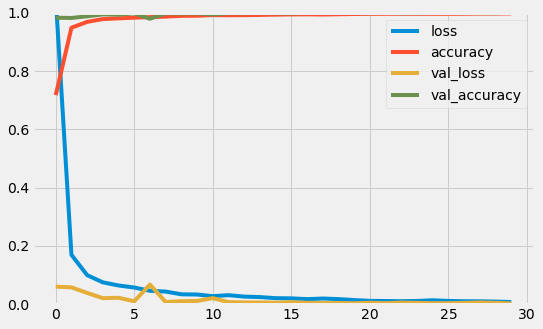

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
# displays grid in background
plt.grid(True)

# the gca() function is used to get the current Axes instance on the current figure matching the given keyword args
# set_ylim() function is used to set the y-axis view limits (By default it sets the y-axis limits from 0-1)
plt.gca().set_ylim(0, 1)
plt.show()

From above output we see that the train loss and validation loss are both almost equal and close to 0. Moreover the training accuracy and validation accuracy is close to 1 that is almost 99%

**Loading the test data and running the predictions**

In [18]:
# importing the csv file
test = pd.read_csv(data_dir + '/Test.csv')

# setting the labels
labels = test["ClassId"].values
# storing the image paths in the test data
imgs = test["Path"].values

# creating an empty list
data =[]

for img in imgs:
    try:
        # after taking images from each folder we are just reading those images here
        image = cv2.imread(data_dir + '/' +img)
        # here we put all those images into an array
        # create an image memory
        image_fromarray = Image.fromarray(image, 'RGB')
        # resizing the images into 30x30 pixel size
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        # after resizing we again put the images into an array and then appending in the list data
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

# rescaling the images
X_test = np.array(data)
X_test = X_test/255

# here we perfrom testing 
predict_x=model.predict(X_test) 
# argmax() function returns indices of the max element of the array in a particular axis
classes_x=np.argmax(predict_x,axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, classes_x)*100)

Test Data accuracy:  98.1631037212985


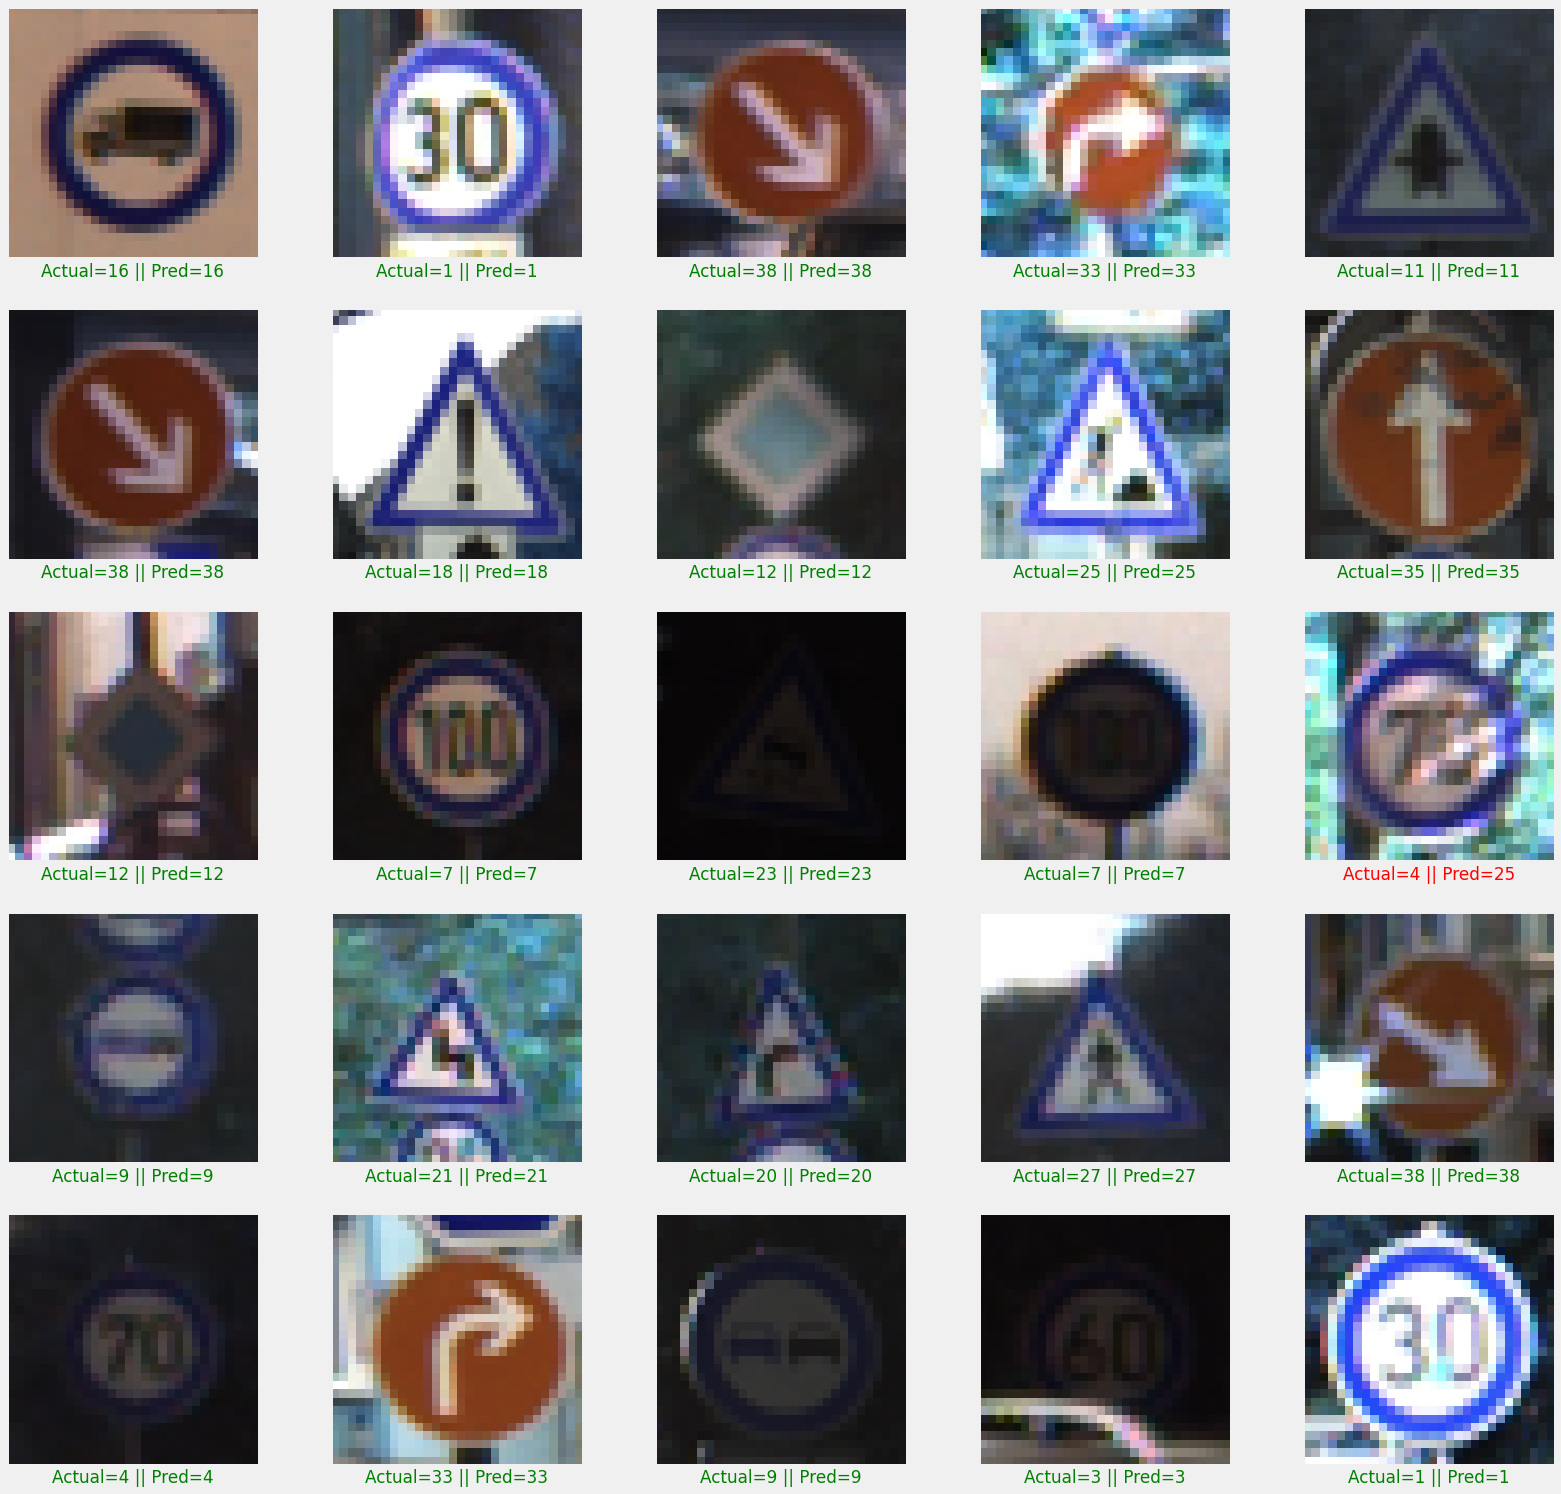

In [22]:
# Now we plot some of the test images by predicting the images 
plt.figure(figsize = (25, 25))

start_index = 0
# to show the first 25 images, use a loo[]
for i in range(25):
    # subplot function is used to create mulitple plots in the same row and column
    plt.subplot(5, 5, i + 1)
    # there should not be a grid
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # store the predicted values from the classes array
    prediction = classes_x[start_index + i]
    # store the actual label from the labels array
    actual = labels[start_index + i]
    # set the variable col as 'g' (green)
    col = 'g'
    # use the conditional statement
    if prediction != actual:
        # if the prediction is not the same as actual then set col as 'r' (red)
        col = 'r'
    # set the x label and its color
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    # use the imshow function to print the image
    plt.imshow(X_test[start_index + i])
plt.show()

**Confusion matrix and Classification Report**

In [23]:
from sklearn.metrics import confusion_matrix
# confusion metrics for correlation between all 43 classes
cf = confusion_matrix(labels, classes_x)

<AxesSubplot:>

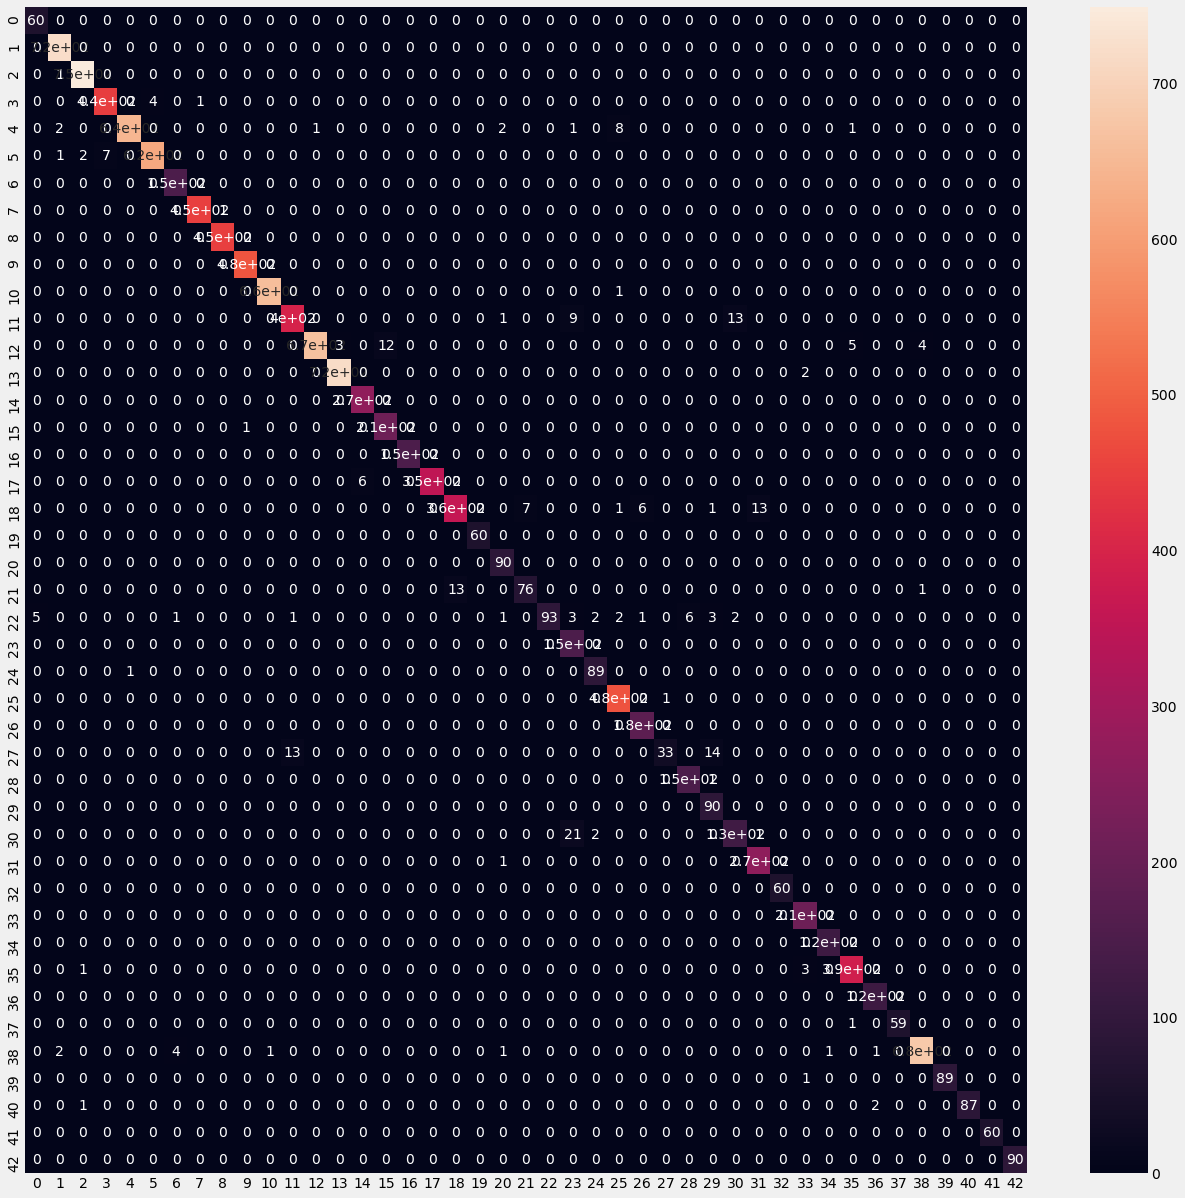

In [24]:
import seaborn as sns
# heatmap of confusion matrix
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
# annot=True will display the annotations
sns.heatmap(df_cm, annot=True)

In [25]:
# generating a classification report for all 43 classes
from sklearn.metrics import classification_report

print(classification_report(labels, classes_x))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       0.99      1.00      1.00       720
           2       0.99      1.00      1.00       750
           3       0.98      0.99      0.99       450
           4       1.00      0.98      0.99       660
           5       0.99      0.98      0.99       630
           6       0.97      1.00      0.98       150
           7       1.00      1.00      1.00       450
           8       1.00      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.97      0.95      0.96       420
          12       1.00      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       0.98      1.00      0.99       270
          15       0.95      1.00      0.97       210
          16       1.00      1.00      1.00       150
          17       1.00    

**Using the Model on a random image or a set of image to make predictions**

2
Speed limit (50km/h)


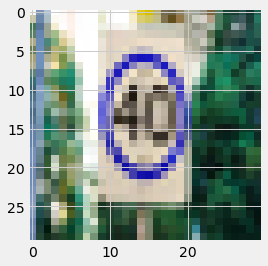

In [27]:
# Using our model to predict a traffic sign in a random image

# store the model name in the variable model_path
model_path = "TSR_model.h5"
# use the keras function to load the model
loaded_model = tf.keras.models.load_model(model_path)

# read the image from the directory using imread function
image = cv2.imread(data_dir + '/' +'testimage.jpg')

# use the Image.fromarray function to create an image memory
image_fromarray = Image.fromarray(image, 'RGB')
# resize the image
resize_image = image_fromarray.resize((30, 30))
# increase its dimension by 1
expand_input = np.expand_dims(resize_image,axis=0)
# store as a numpy array
input_data = np.array(expand_input)
# scale down
input_data = input_data/255

# find the predicted label using the model
pred = loaded_model.predict(input_data)
# argmax() function returns indices of the max element of the array in a particular axis
result = pred.argmax()

# print the image
plt.imshow(resize_image)
# print the number of the category
print(result)
# print the name of the category
print(classes[result])

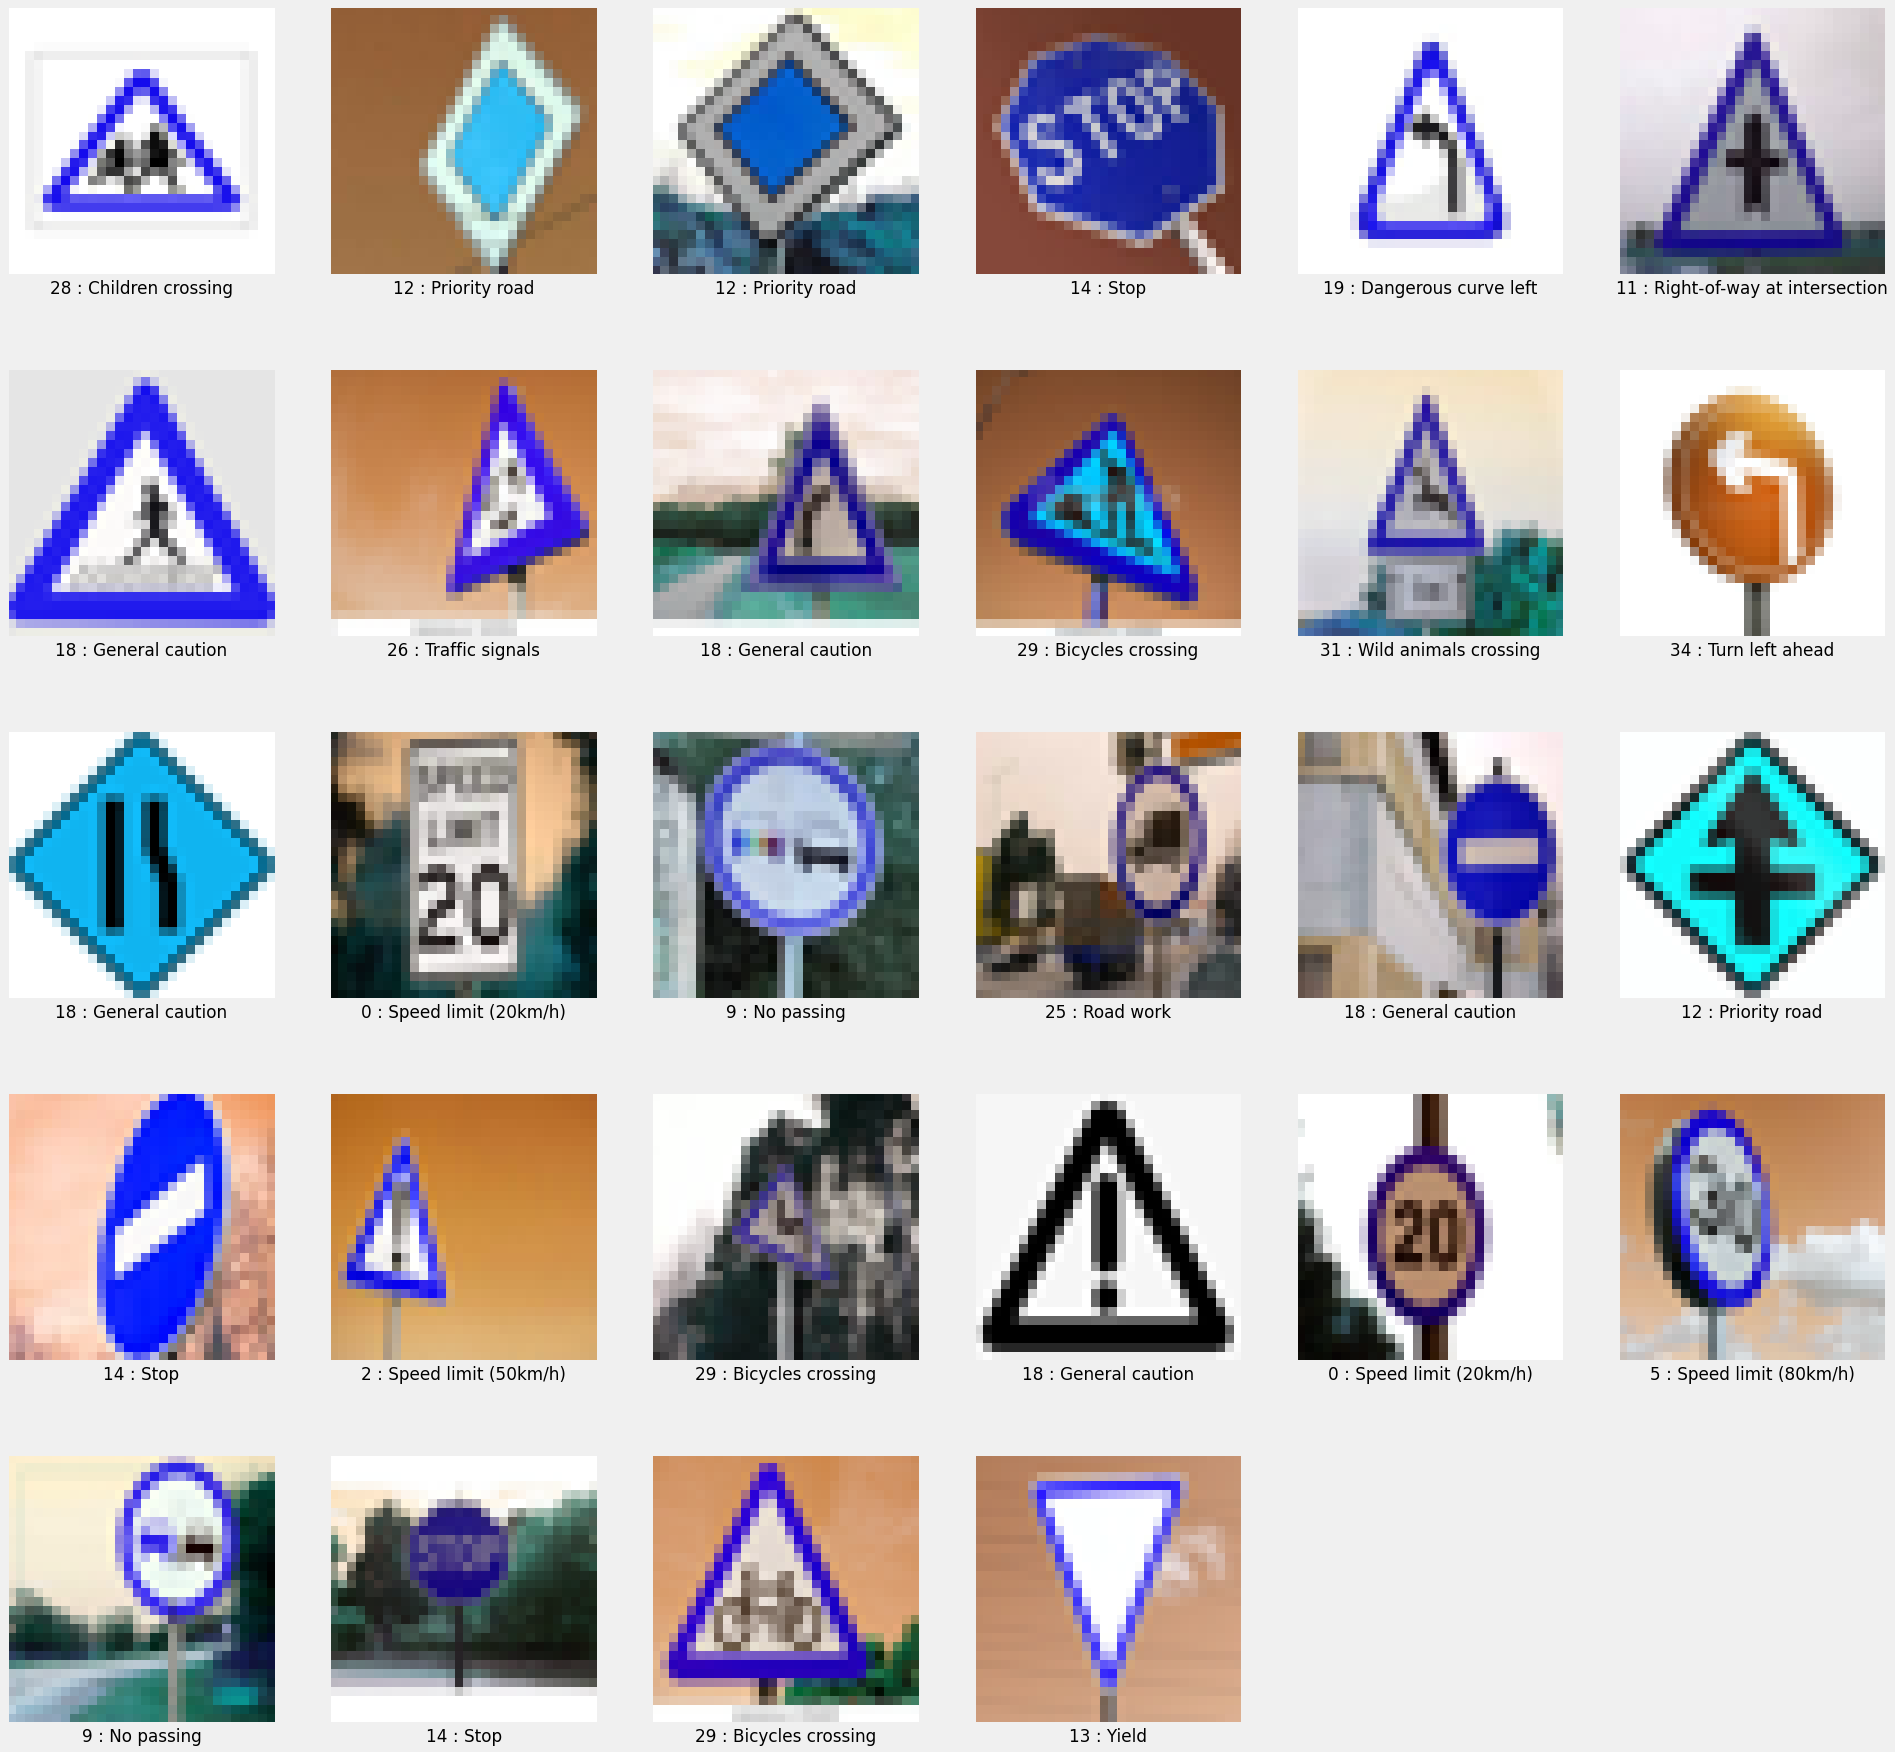

In [28]:
# Using our model to predict a traffic sign on a set of images

# store the model name in the variable model_path
model_path = "TSR_model.h5"
# use the keras function to load the model
loaded_model = tf.keras.models.load_model(model_path)

# create empty lists
images = []
results_num = []
results_classes = []

# store the list of elements in the images folder in the variable 'folder'
folder = os.listdir(data_dir + '/images')

# use a for loop for each element(img) in folder
for img in folder:
    # read the image
    image = cv2.imread(data_dir + '/images/' + img)
    image_fromarray = Image.fromarray(image, 'RGB')
    # resize
    resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
    # append to the array of images
    # before increasing the dimensions so it can be printed later
    images.append(resize_image)
    # increase the dimensions
    expand_input = np.expand_dims(resize_image,axis=0)
    # create a numpy array
    input_data = np.array(expand_input)
    # scale down
    input_data = input_data/255
    # find the predicted probabilities
    pred = loaded_model.predict(input_data)
    # find the label (one with the max probability)
    res = pred.argmax()
    # append the predicted value (number) in the number of result array
    results_num.append(res)
    # append the predicted category name in the class of result array
    results_classes.append(classes[res])
    
#set the figure size
plt.figure(figsize = (30, 30))

# for loop with no of iterations same as the no of elements in the folder
for i in range(len(folder)):
    # set subplot
    plt.subplot(5, 6, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # label will be the category number and its name
    label = [results_num[i],results_classes[i]]
    # x label
    plt.xlabel('{} : {}'.format(label[0], label[1]))
    # print the image
    plt.imshow(((images[i])))
plt.show()